In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
epic = 'TIC349374677'
numax = []
dnu = []
teff = [4947, 80]
bp_rp = [1.34, 0.2]

/Users/davies/Library/Python/3.6/lib/python/site-packages/lightkurve/periodogram.py:752: LightkurveWarning: Input light curve will be normalized.
  LightkurveWarning)


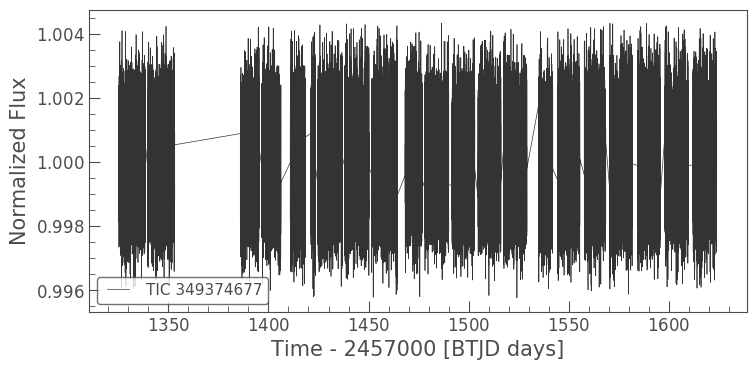

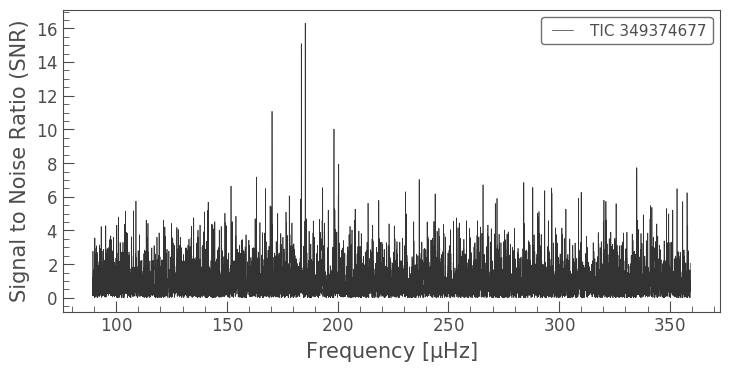

In [6]:
lcs = lk.search_lightcurvefile(epic).download_all()
lc = lcs.PDCSAP_FLUX.stitch().normalize().flatten(window_length=401).remove_outliers(4)
lc.plot()
pg = lc.to_periodogram(normalization='psd', minimum_frequency=numax[0] - dnu[0]*8, 
                       maximum_frequency=numax[0] + dnu[0]*8).flatten()
pg.plot()

In [7]:
seis = pg.to_seismology()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d4c2358>,
      dtype=object)

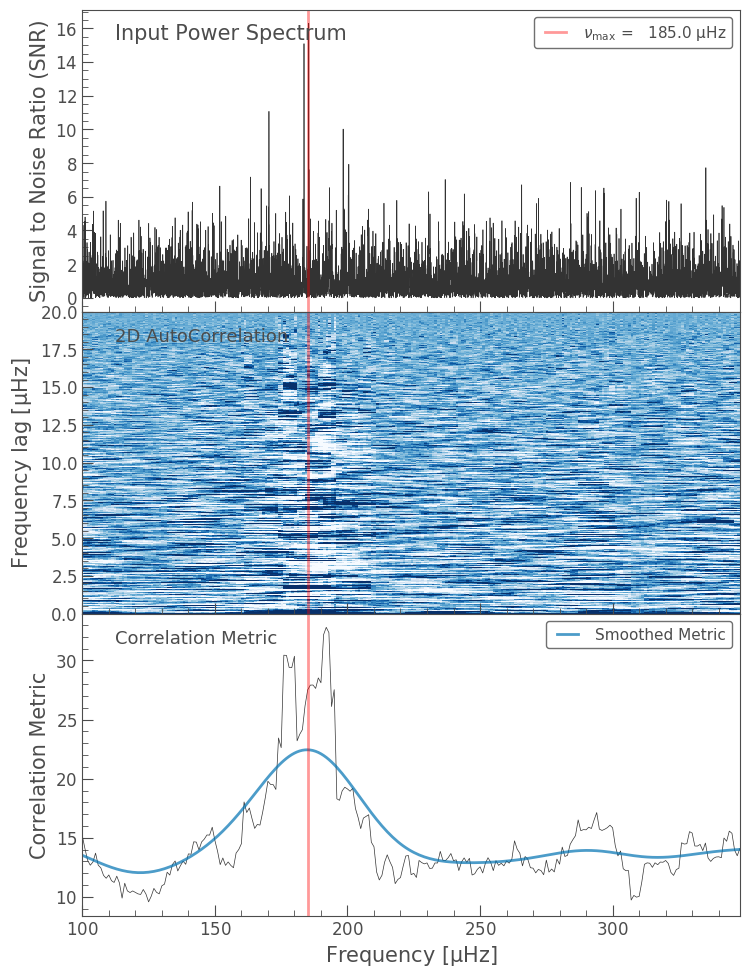

In [10]:
seis.estimate_numax(window_width=20, spacing=1)
seis.diagnose_numax()

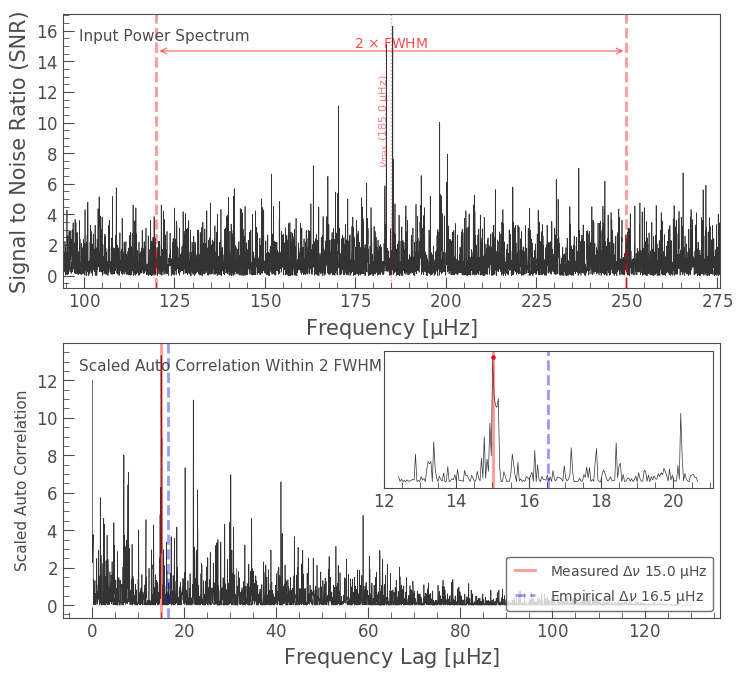

In [11]:
seis.estimate_deltanu()
seis.diagnose_deltanu()

In [14]:
numax = [seis.numax.value, 5.0]
dnu = [seis.deltanu.value, 0.2]

[185.0, 5.0]

In [15]:
star = pb.star(epic, pg, 
               numax, dnu, teff, bp_rp, 
               store_chains=True, 
               nthreads=4, make_plots=True)

  8%|▊         | 1500/20000 [00:24<04:57, 62.28it/s]

Converged after 1500 iterations.



 12%|█▎        | 2500/20000 [01:26<10:06, 28.84it/s]

Converged after 2500 iterations.



Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
INFO:pymc3:NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:35<00:00, 84.17draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 3min 7s, sys: 3.76 s, total: 3min 11s
Wall time: 4min 39s


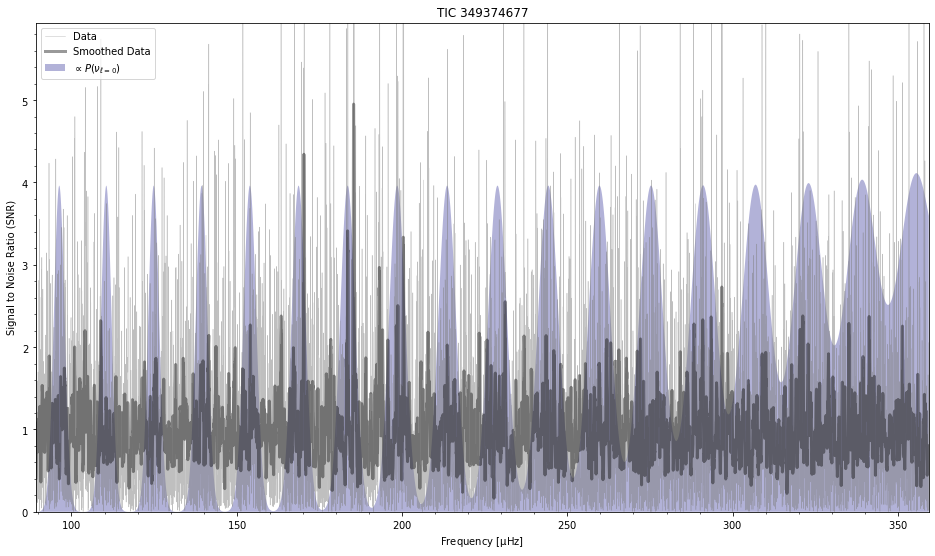

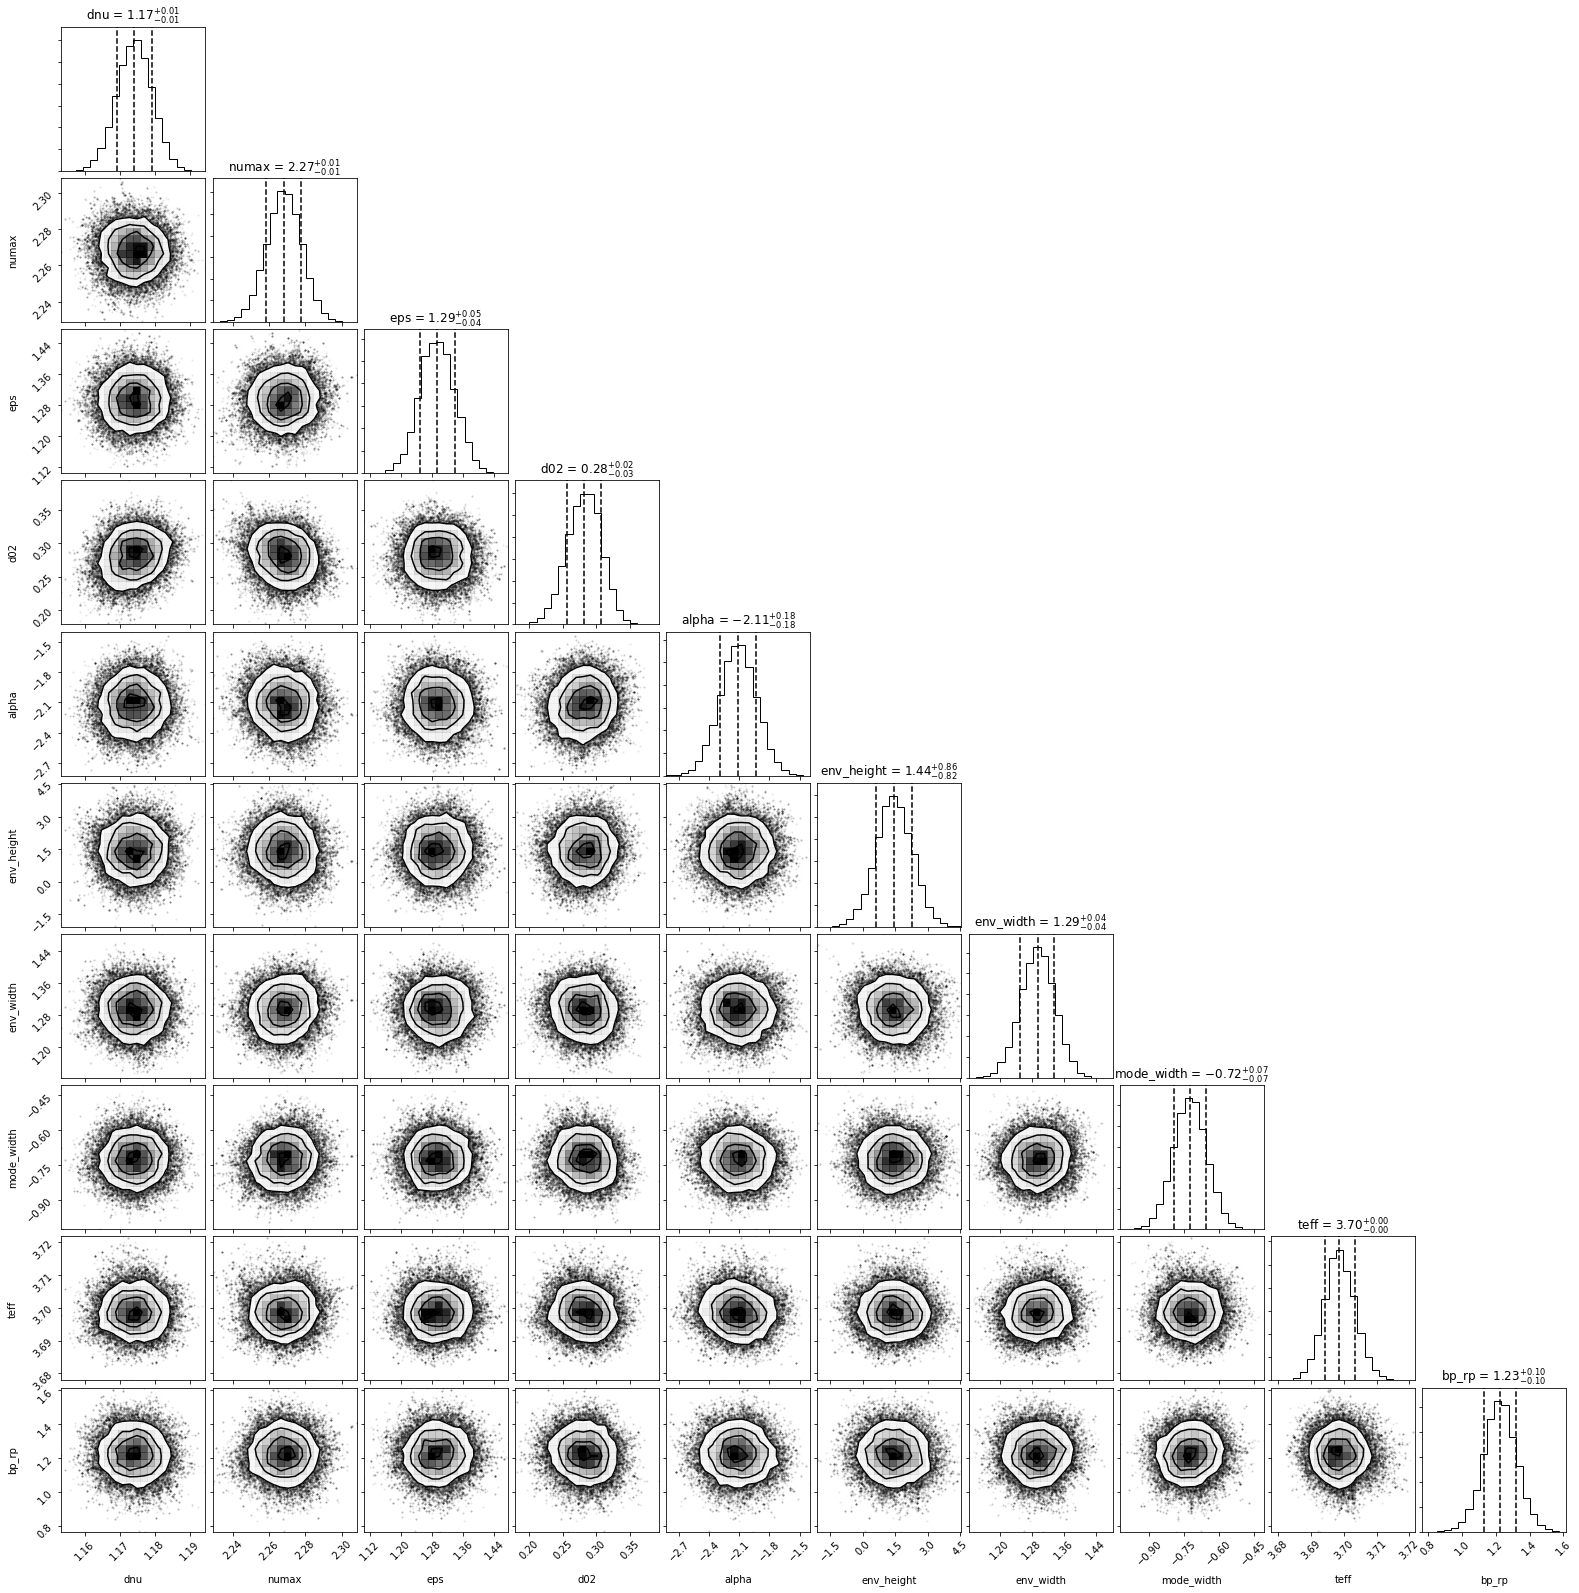

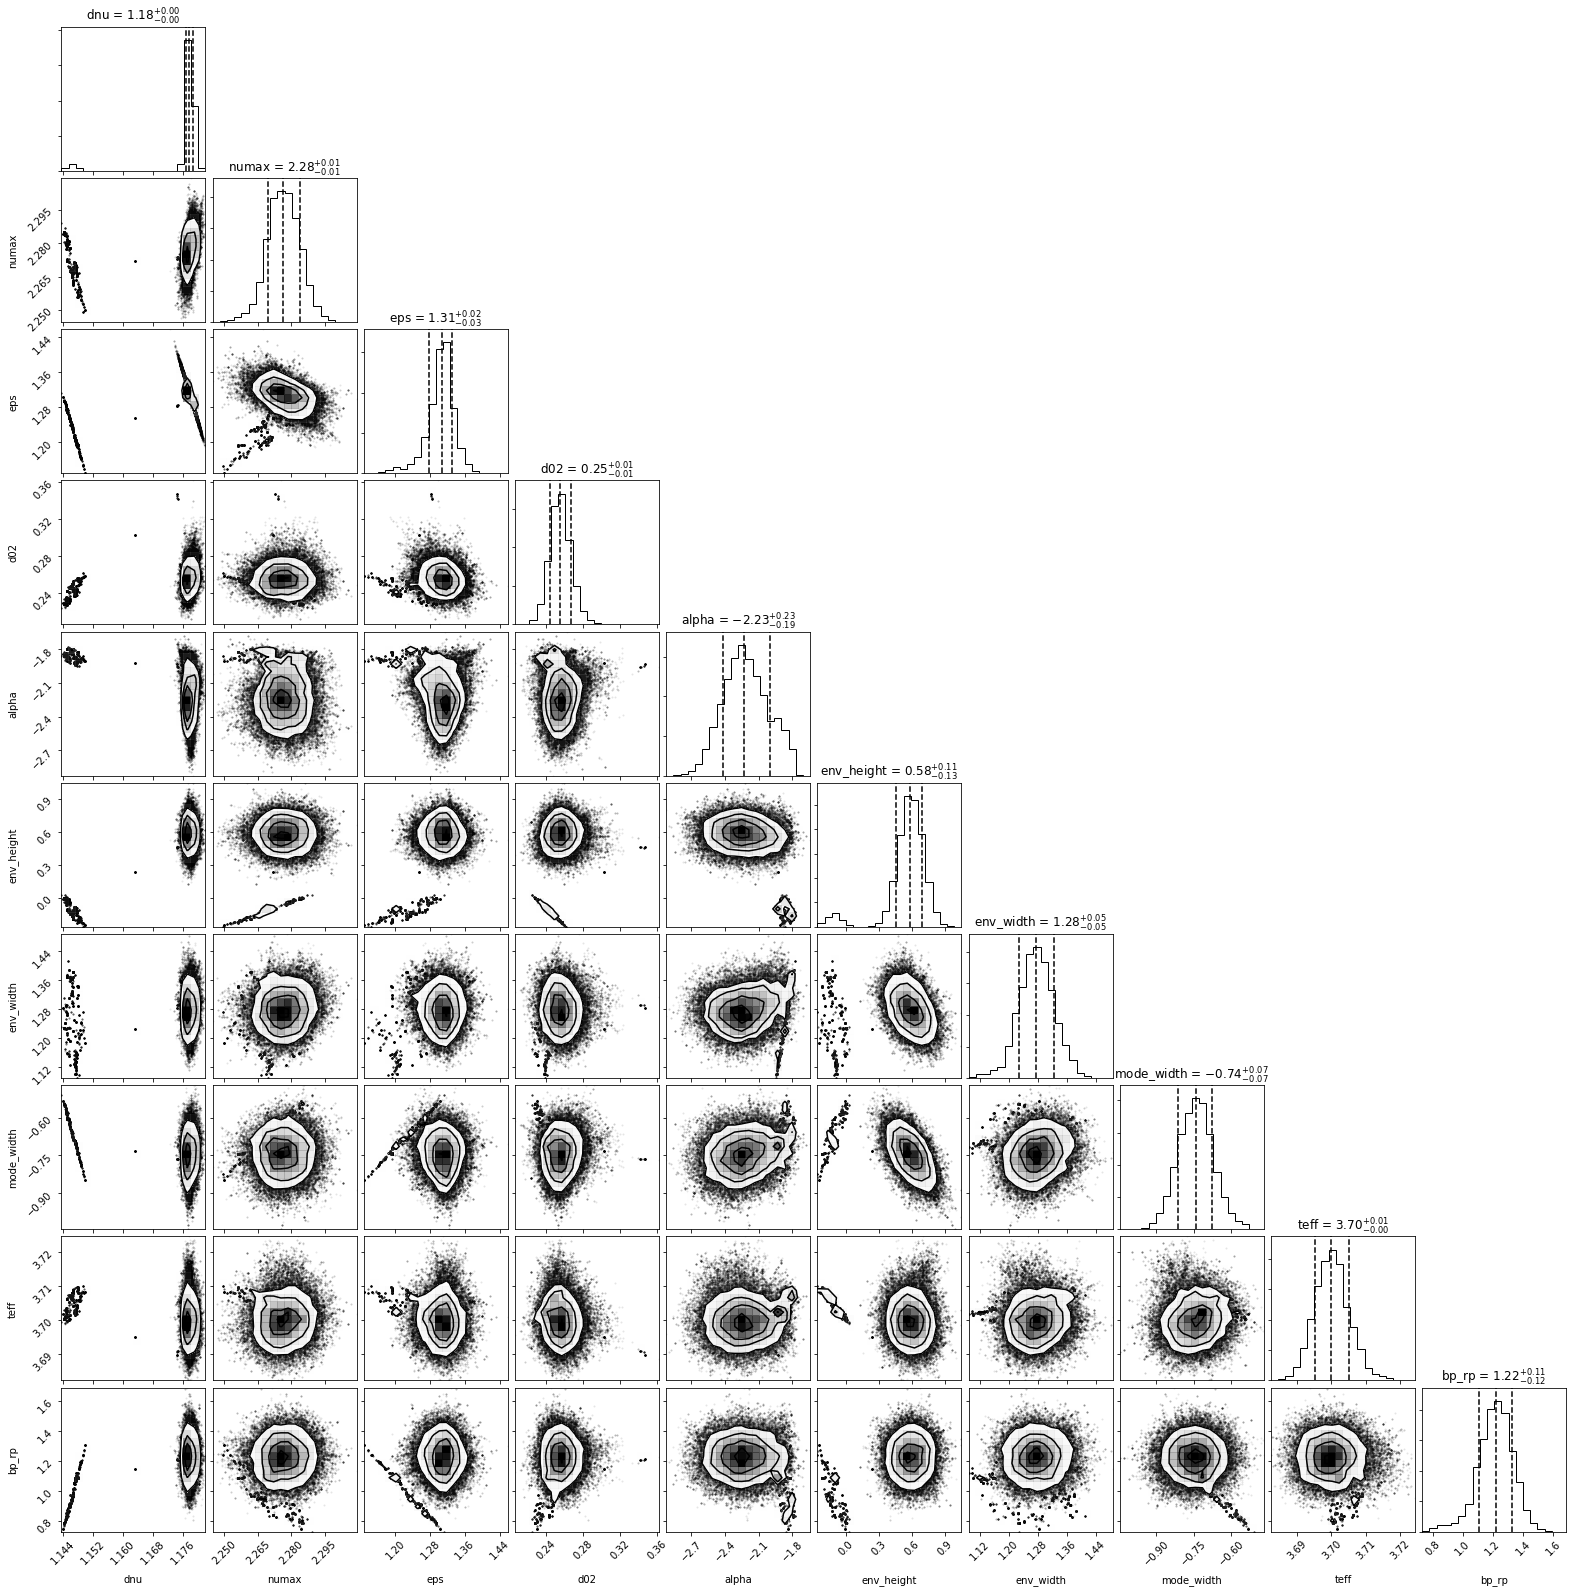

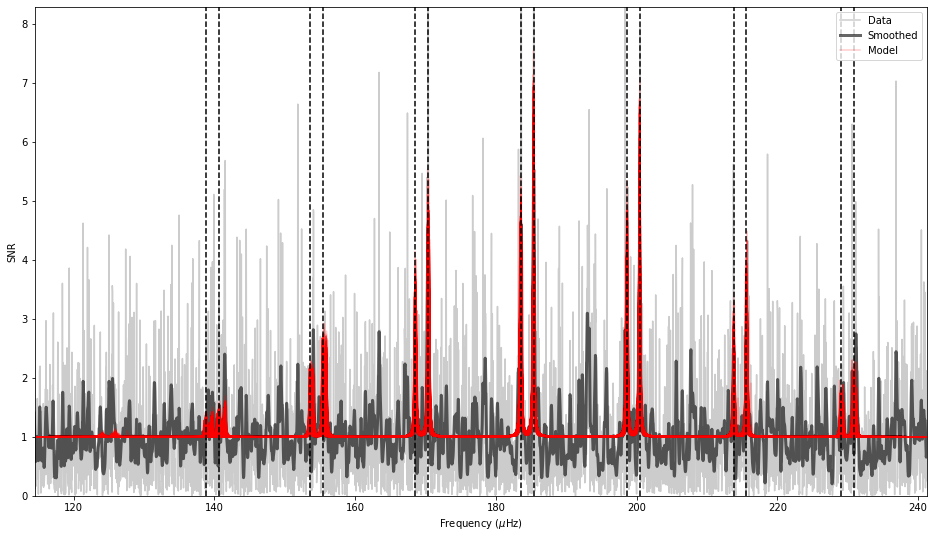

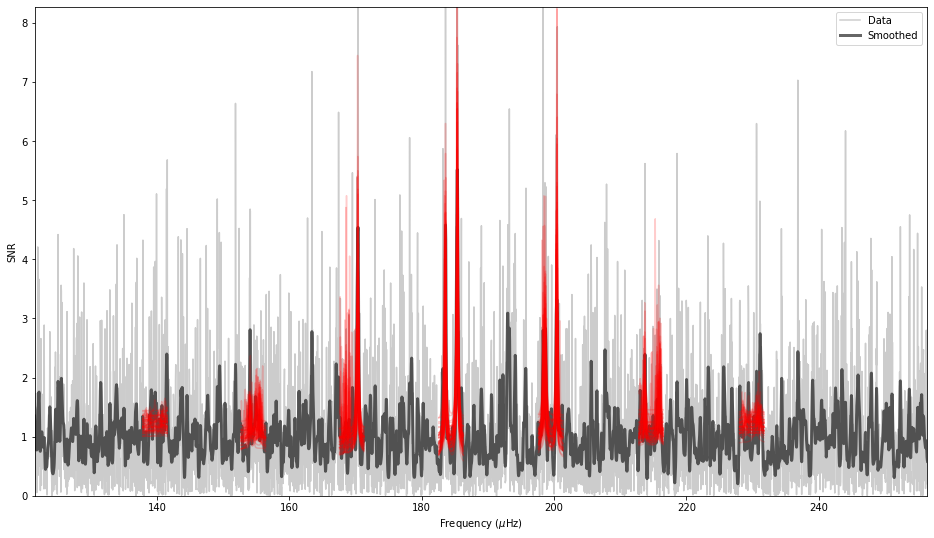

In [17]:
%%time
star(norders=7)

/Users/davies/Library/Python/3.6/lib/python/site-packages/lightkurve/seismology/core.py:171: LightkurveWarning: You have passed both a numax and a frequency limit. The frequency limit will override the numax input.
  LightkurveWarning)


AttributeError: 'NoneType' object has no attribute 'savefig'

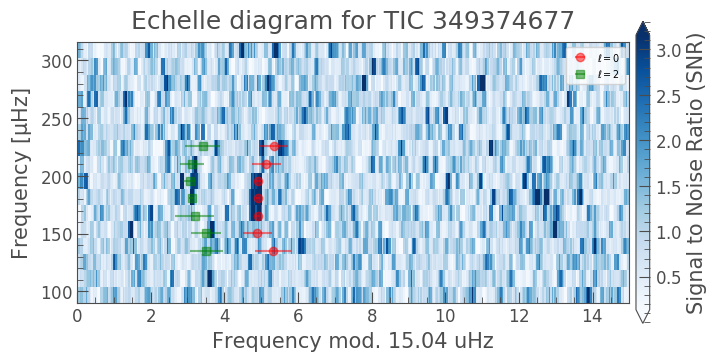

In [21]:
star.peakbag.plot_echelle(pg).savefig('echelle_TIC349374677.png')

In [19]:
import pymc3 as pm
pm.summary(star.peakbag.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,140.673616,0.481792,0.009139,139.724986,141.581184,2479.720900,0.999676
l0__1,155.291431,0.400745,0.009573,154.628868,156.121121,1477.133872,0.999134
l0__2,170.348279,0.054766,0.001285,170.241837,170.459098,1750.163268,1.002243
l0__3,185.393708,0.051120,0.001250,185.301110,185.509824,1613.049769,0.999848
l0__4,200.435790,0.072398,0.002003,200.298552,200.558312,1082.488618,1.003548
l0__5,215.687786,0.392496,0.011592,214.836772,216.370483,1138.385655,0.999274
l0__6,230.944703,0.377671,0.008991,230.147630,231.595215,1707.544678,0.999272
l2__0,138.860671,0.450715,0.009289,137.990369,139.764466,2525.731016,0.999581
l2__1,153.902761,0.408115,0.015686,152.862346,154.557700,579.975986,1.000066
l2__2,168.631430,0.529105,0.027559,167.632143,169.608308,143.573825,1.023412
